# ResNet50 Art Style Classifier

In [1]:
from fastai.vision import *
import zipfile
import numpy
import os
path = Path('data/artData')

In [2]:
myfile = 'small_25_100_data.zip'
with zipfile.ZipFile(path/myfile,'r') as zip_ref:
    zip_ref.extractall(path)

In [2]:
path = Path('data/artData/small_25_100_data')
classes = []
for root, dirs, files in os.walk(path, topdown=True):
    for name in dirs:
        classes.append(name)
print(classes)

['Naïve Art (Primitivism)', 'Ukiyo-e', 'Rococo', 'Baroque', 'Abstract Expressionism', 'High Renaissance', 'Magic Realism', 'Art Informel', 'Abstract Art', 'Art Nouveau (Modern)', 'Post-Impressionism', 'Mannerism (Late Renaissance)', 'Northern Renaissance', 'Symbolism', 'Early Renaissance', 'Romanticism', 'Expressionism', 'Realism', 'Impressionism', 'Surrealism', 'models', 'Cubism', 'Neoclassicism']


In [3]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

Naïve Art (Primitivism)


Ukiyo-e


Rococo


Baroque


Abstract Expressionism


High Renaissance


Magic Realism


Art Informel


Abstract Art


Art Nouveau (Modern)


Post-Impressionism


Mannerism (Late Renaissance)


Northern Renaissance


Symbolism


Early Renaissance


Romanticism


Expressionism


Realism


Impressionism


Surrealism


models
Cubism


Neoclassicism


In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, bs=16, num_workers=4).normalize(imagenet_stats)

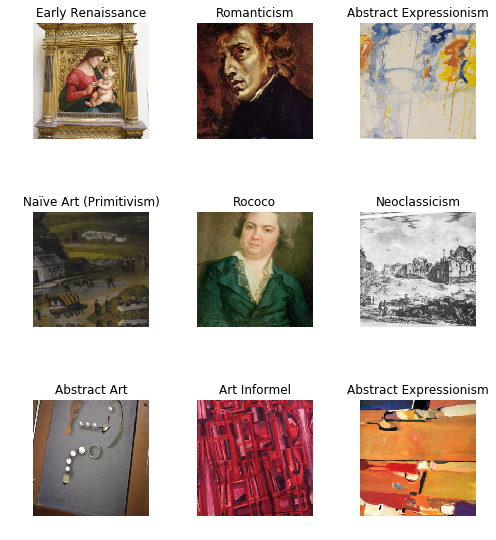

In [5]:
data.show_batch(rows=3, figsize=(7,8))

In [6]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Abstract Art',
  'Abstract Expressionism',
  'Art Informel',
  'Art Nouveau (Modern)',
  'Baroque',
  'Cubism',
  'Early Renaissance',
  'Expressionism',
  'High Renaissance',
  'Impressionism',
  'Magic Realism',
  'Mannerism (Late Renaissance)',
  'Naïve Art (Primitivism)',
  'Neoclassicism',
  'Northern Renaissance',
  'Post-Impressionism',
  'Realism',
  'Rococo',
  'Romanticism',
  'Surrealism',
  'Symbolism',
  'Ukiyo-e'],
 22,
 440,
 109)

In [7]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [8]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,4.200675,3.485342,0.743119,00:06
1,3.159708,3.294945,0.733945,00:04
2,2.365932,2.866869,0.715596,00:04
3,1.811135,2.874500,0.715596,00:04


In [9]:
interp = ClassificationInterpretation.from_learner(learn)

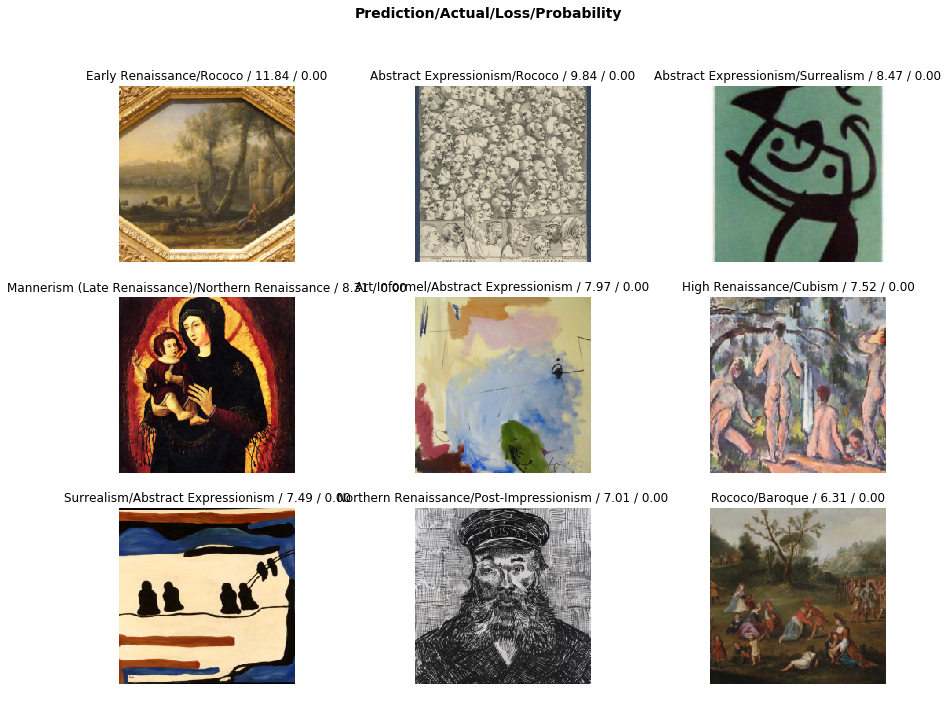

In [10]:
interp.plot_top_losses(9, figsize=(15,11))

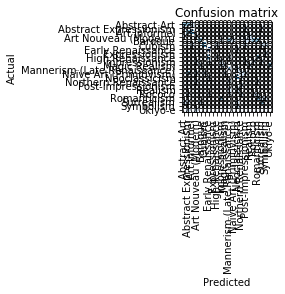

In [11]:
interp.plot_confusion_matrix()

In [12]:
learn.save('stage-1')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


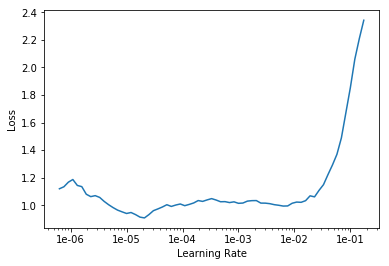

In [13]:
# Setting hyperparameters, pretty garbage rn
learn.lr_find()
learn.recorder.plot()

In [14]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-4,1e-2))

epoch,train_loss,valid_loss,error_rate,time
0,2.259100,7.062152,0.752294,00:06
1,3.527130,32.200455,0.926606,00:06
2,3.796812,8.223461,0.853211,00:06
3,3.383990,2.944045,0.770642,00:06
4,2.916228,2.606341,0.743119,00:06


In [15]:
learn.save('stage-2')

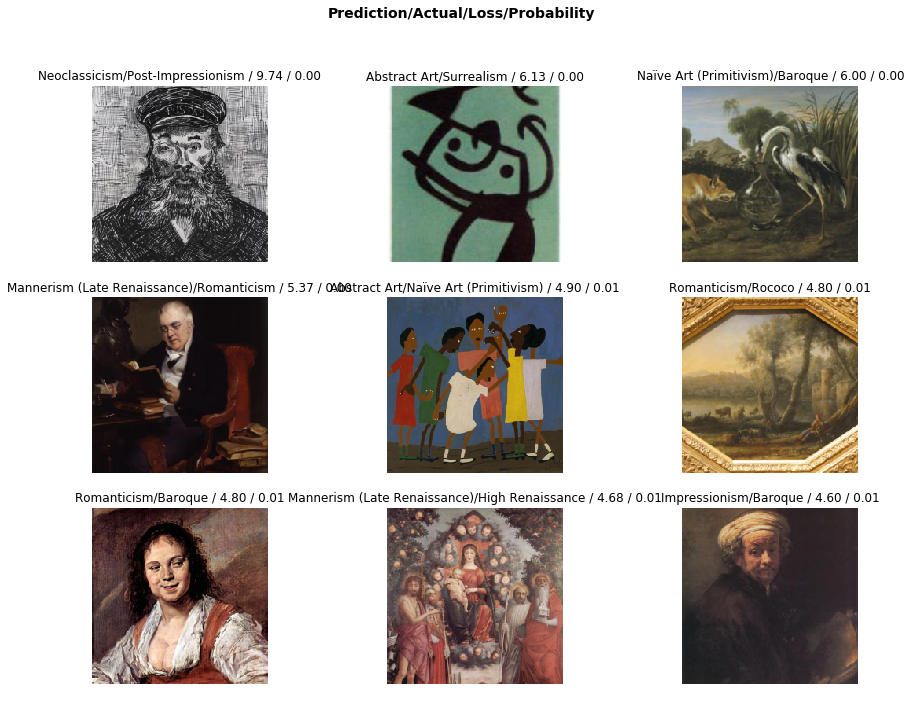

In [16]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,11))

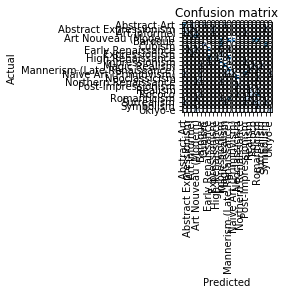

In [17]:
interp.plot_confusion_matrix()